In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting options for displaying all the data
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
# Read the data and look at few records
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 1460 row of data having 81 columns, SalePrice is the target variable

## Data cleaning

1. Validate data types
2. Missing value imputation where required
3. Outlier handling

### Data type validation from data dictionary

All the data types are as expected.

Below variables are of categorical type but are represented by numerical values
 
 - MSSubClass  : Categorical
 - OverallQual : categorical ordered
 - OverallCond : categorical ordered

In [6]:
# dropping Id since it is irrelevent for the analysis
df.drop(["Id"], axis = 1, inplace = True)
df.shape

(1460, 80)

### Handling missing values

In [7]:
# check all the columns for count and percentage of missing value
df_null = pd.DataFrame()
df_null["Count"] = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
df_null["%age"] = (df.isnull().sum()[df.isnull().sum() > 0]/14.60)

In [8]:
df_null

,Count,%age
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


#### For below fields NA represents absesce of certain attribute, hence we will replace null with 'NA' 

PoolQC: Pool quality

       NA	No Pool
MiscFeature: Miscellaneous feature not covered in other categories

       NA	  None
Alley: Type of alley access to property

       NA 	No alley access
Fence: Fence quality

       NA	No Fence
FireplaceQu: Fireplace quality

       NA	No Fireplace
GarageType: Garage location

       NA	No Garage
GarageFinish: Interior finish of the garage

       NA	No Garage
GarageQual: Garage quality

       NA	No Garage
GarageCond: Garage condition

       NA	No Garage
BsmtExposure: Refers to walkout or garden level walls

       NA	No Basement
BsmtFinType2: Rating of basement finished area (if multiple types)

       NA	No Basement
BsmtFinType1: Rating of basement finished area

       NA	No Basement
BsmtCond: Evaluates the general condition of the basement

       NA	No Basement
BsmtQual: Evaluates the height of the basement

       NA	No Basement

In [9]:
#replacing null with 'NA' for variable where NA has meaning according to data dictionary
df.PoolQC.fillna('NA', inplace = True)
df.MiscFeature.fillna('NA', inplace = True)
df.Alley.fillna('NA', inplace = True)
df.Fence.fillna('NA', inplace = True)
df.FireplaceQu.fillna('NA', inplace = True)
df.GarageType.fillna('NA', inplace = True)
df.GarageFinish.fillna('NA', inplace = True)
df.GarageQual.fillna('NA', inplace = True)
df.GarageCond.fillna('NA', inplace = True)
df.BsmtExposure.fillna('NA', inplace = True)
df.BsmtFinType2.fillna('NA', inplace = True)
df.BsmtFinType1.fillna('NA', inplace = True)
df.BsmtCond.fillna('NA', inplace = True)
df.BsmtQual.fillna('NA', inplace = True)

In [10]:
# check all the columns for count and percentage of missing value
df_null = pd.DataFrame()
df_null["Count"] = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
df_null["%age"] = (df.isnull().sum()[df.isnull().sum() > 0]/14.60)
df_null

,Count,%age
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


In [11]:
# LotFrontage: Linear feet of street connected to property
# Since a lot can not have 0 lot frontage we will impute the null values as the mean
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace = True)

In [12]:
# GarageYrBlt: Year garage was built
# From previous null counts we can see that the 81 null values are for 'No Garage', we will impute it to 0
# GarageType	81	5.547945
# GarageYrBlt	81	5.547945
df.GarageYrBlt.fillna(0, inplace = True)

In [13]:
# Analysis for MasVnrType and MasVnrArea (Masonry veneer type and area)
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [14]:
# We will impute missing MasVnrType as None and MasVnrArea as 0
df.MasVnrType.fillna("None", inplace = True)
df.MasVnrArea.fillna(0, inplace = True)

In [15]:
# looking at Electrical
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [16]:
# impute Electrical with Mode, ie : SBrkr    
df.Electrical.fillna("SBrkr", inplace = True)

In [17]:
# check all the columns for count and percentage of missing value
df_null = pd.DataFrame()
df_null["Count"] = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
df_null["%age"] = (df.isnull().sum()[df.isnull().sum() > 0]/14.60)
df_null

,Count,%age


In [18]:
#checking duplicate rows
df[df.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### All the null values are imputed as mentioned below
- NA has a specific meaning
    - PoolQC
    - MiscFeature
    - Alley
    - Fence
    - FireplaceQu
    - GarageType
    - GarageFinish
    - GarageQual
    - GarageCond
    - BsmtExposure
    - BsmtFinType2
    - BsmtFinType1
    - BsmtCond
    - BsmtQual

- Central value(mean, mode)
    - LotFrontage (mean)
    - MasVnrType  (mode)
    - Electrical  (mode)
- Other (business logic)
    - GarageYrBlt (Zero for no garage)
    - MasVnrArea  (Zero for Masonry veneer type None)

## EDA

In [19]:
# creating Derived metrics
df["PropAge"] = pd.datetime.now().year-df['YearBuilt']      # Age of property
df["RemodAge"] = pd.datetime.now().year- df['YearRemodAdd'] # Age of remodel
df["GarageAge"] = pd.datetime.now().year-df['GarageYrBlt']  # Age of garage
df["GarageAge"] = df["GarageAge"].replace(2022,0)
df["SaleYr"] = df["YrSold"] - 2005                          # finaltial year sold(1st : 2006, 2nd : 2007 and so on)

In [20]:
# Dropping un necessary columns
df = df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','MoSold'],axis=1)

In [21]:
varCat = list(set(df.columns) - set(df.select_dtypes(include=np.number).columns.tolist()))
len(varCat)

43

In [22]:
varNum = df.select_dtypes(include=np.number).columns.tolist()
len(varNum)

36

In [23]:
len(varNum)*4

144

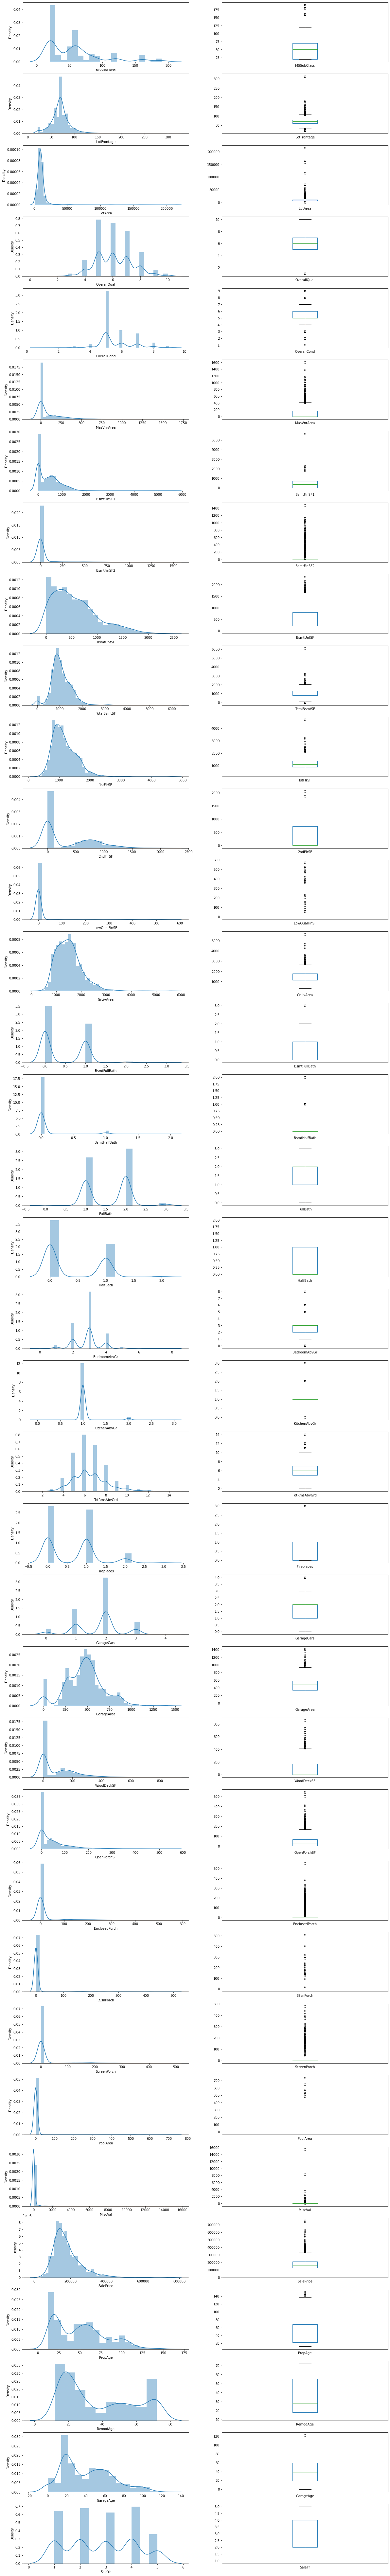

In [24]:
plt.figure(figsize= (20,148))
for col in varNum:
    plt.subplot(37, 2, varNum.index(col)*2 + 1)
    sns.distplot(df[col])
    plt.subplot(37, 2, varNum.index(col)*2 + 2)
    df[col].plot.box()
plt.show()

### Analysis from numeric variables:

    MSSubClass  : Categorical variable not to be considered numeric
    LotFrontage : Outlier present 
    LotArea     : Outlier present
    OverallQual : ordered categorical
    OverallCond : ordered categorical
    MasVnrArea  : outlier present, since most of the values are zero, needs further analysis
    BsmtFinSF1  : outlier present, since most of the values are zero, needs further analysis
    BsmtFinSF2  : outlier present, since most of the values are zero, needs further analysis
    BsmtUnfSF   : outlier present, since a lot of values are zero, needs further analysis
    TotalBsmtSF : outlier present
    1stFlrSF    : outlier present
    2ndFlrSF    : no outliers, most of the values are zero
    LowQualFinSF: most of the values are zero, needs further analysis
    GrLivArea   : outlier present
    BsmtFullBath: Cardinal data, no outlier
    BsmtHalfBath: Cardinal data, no outlier
    FullBath    : Cardinal data, no outlier
    HalfBath    : Cardinal data, no outlier
    BedroomAbvGr: Cardinal data, no outlier
    KitchenAbvGr: Cardinal data, no outlier
    TotRmsAbvGrd: Cardinal data, no outlier
    Fireplaces  : Cardinal data, no outlier
    GarageCars  : Cardinal data, no outlier
    GarageArea  : Outlier present but we have enough data above 75 percentile, no outlier treatement required
    WoodDeckSF  : Outlier present, since most of the values are zero, needs further analysis
    OpenPorchSF : Outlier present, since most of the values are zero, needs further analysis
    EnclosedPorch:Outlier present, since most of the values are zero, needs further analysis
    3SsnPorch   : Outlier present, since most of the values are zero, needs further analysis
    ScreenPorch : Outlier present, since most of the values are zero, needs further analysis
    PoolArea    : Outlier present, since most of the values are zero, needs further analysis
    MiscVal     : Outlier present, since most of the values are zero, needs further analysis
    SalePrice   : data is skewed towards Right
    PropAge     : no outliers
    RemodAge    : no outliers
    GarageAge   : no outliers
    GarageAge   : no outliers
    SaleYr      : no outliers

In [25]:
rmvZero = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','GarageArea','WoodDeckSF','OpenPorchSF',
    'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' ]

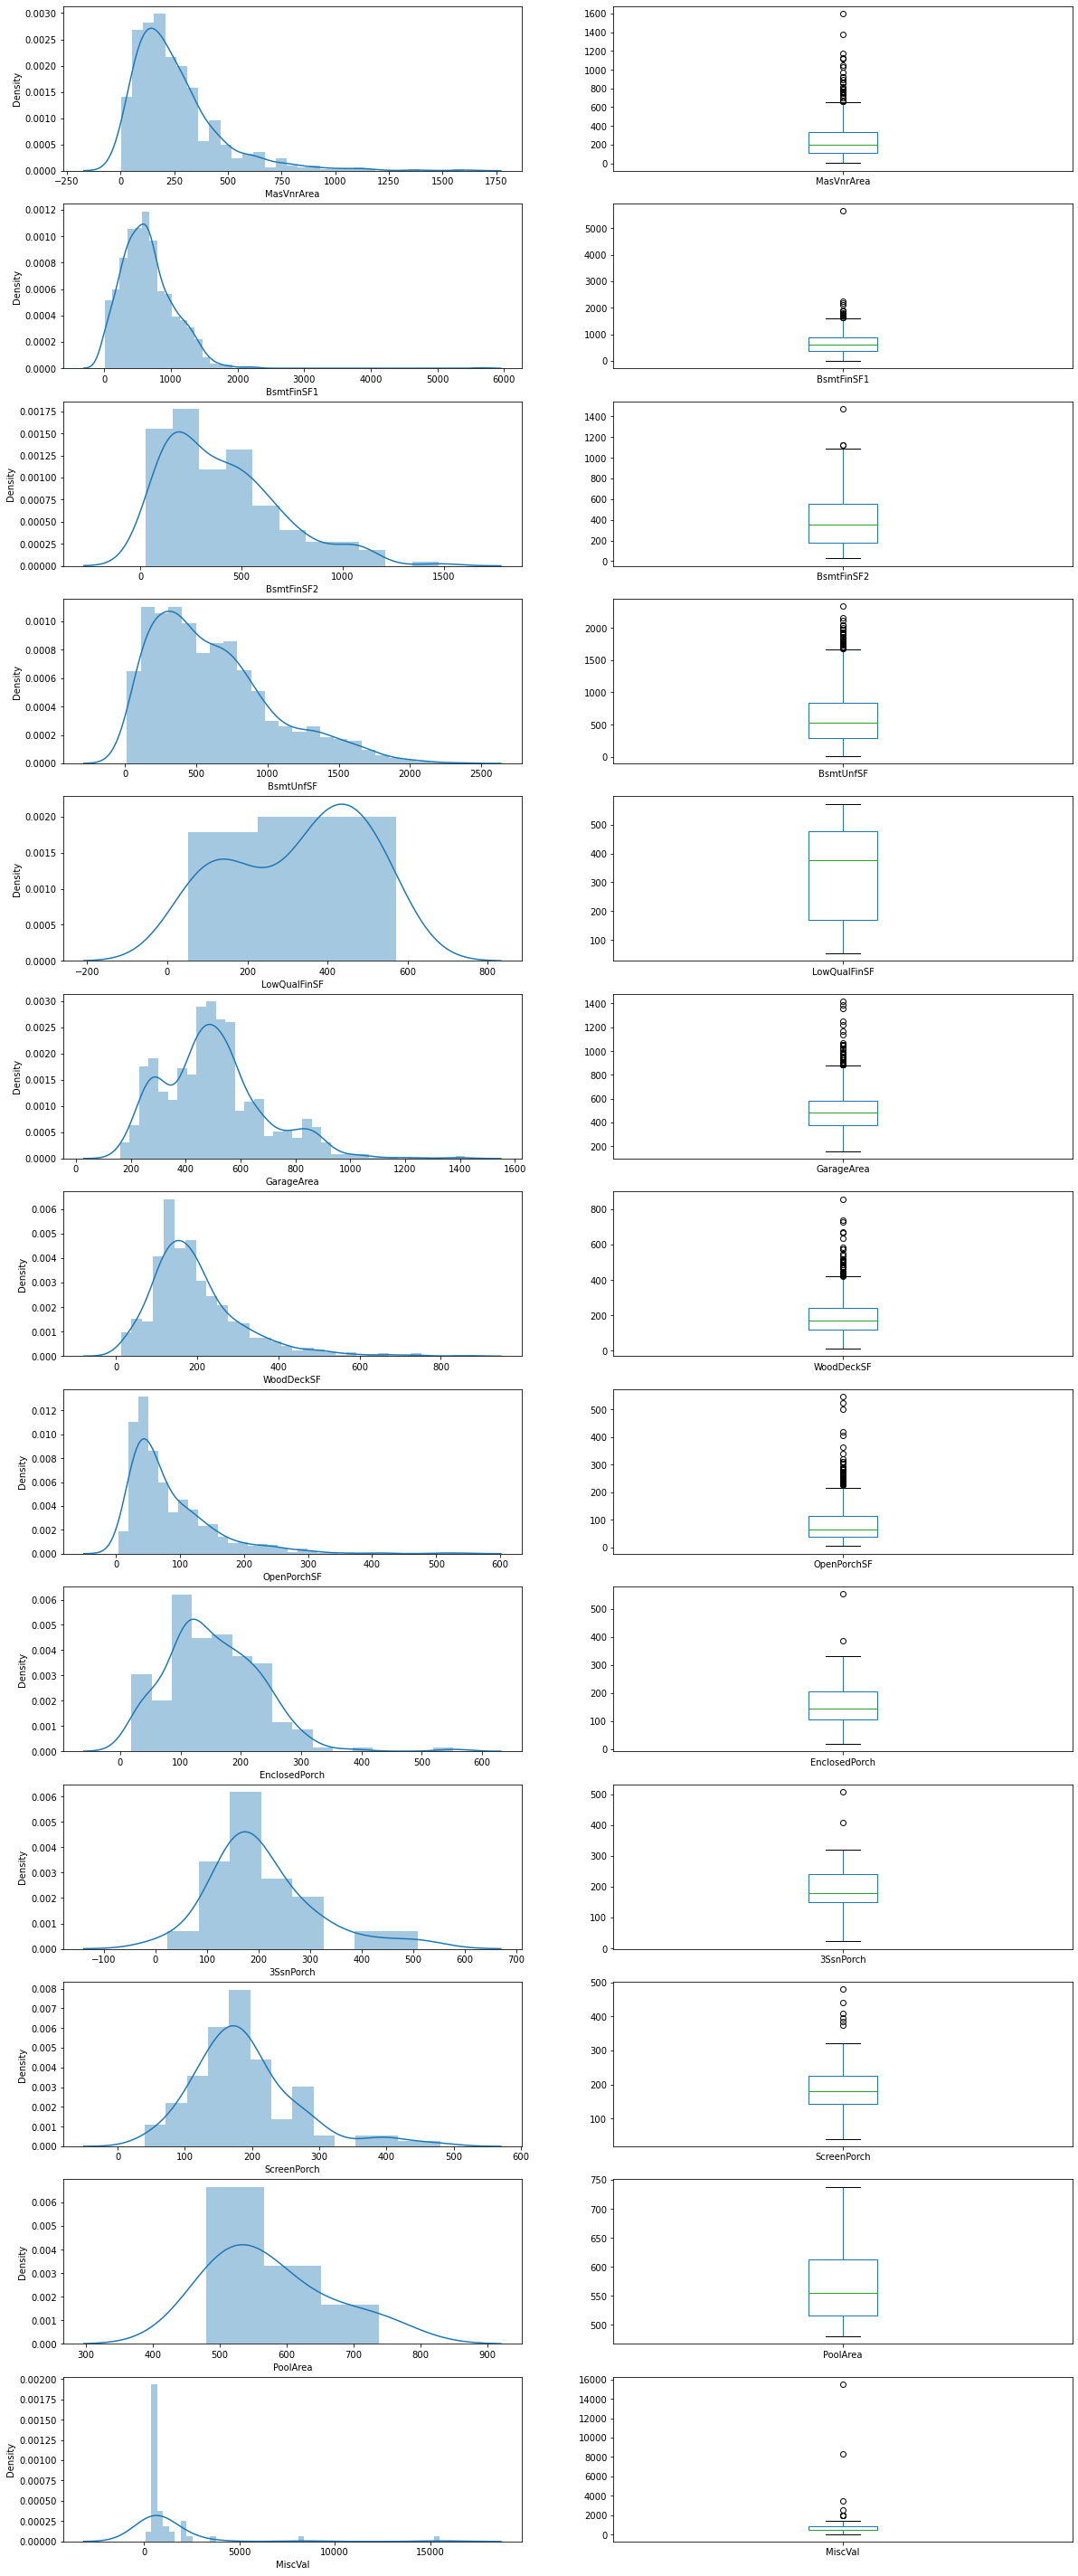

In [26]:
plt.figure(figsize= (20,148))
for col in rmvZero:
    plt.subplot(37, 2, rmvZero.index(col)*2 + 1)
    sns.distplot(df[df[col]>0][col])
    plt.subplot(37, 2, rmvZero.index(col)*2 + 2)
    df[df[col]>0][col].plot.box()
plt.show()

In [27]:
# lets have a look at the percentiles
df.describe(percentiles = [0.21,0.5,0.75, 0.9, 0.95, 0.98, 0.99,0.999])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge,RemodAge,GarageAge,SaleYr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,50.732192,37.134247,41.080822,2.815753
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.979541,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,12.000000,12.000000,0.000000,1.000000
21%,20.000000,60.000000,7200.000000,5.000000,5.000000,0.000000,0.000000,0.000000,179.390000,764.390000,856.780000,0.000000,0.000000,1078.780000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125000.000000,19.000000,17.000000,17.390000,1.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,49.000000,28.000000,37.500000,3.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,68.000000,55.000000,60.000000,4.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,97.100000,72.000000,74.000000,5.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,106.000000,72.000000,92.000000,5.000000
98%,188.200000,120.820000,25251.620000,9.000000,8.000000,650.820000,1442.640000,658.120000,1678.200000,2001.640000,2072.280000,1318.560000,0.000000,2782.380000,1.000000,1.000000,3.000000,1.000000,4.000000,2.000000,10.820000,2.000000,3.000000,907.460000,430.100000,240.82000

### Conclusions regarding outliers, below filds have outliers present
    LotFrontage 
    LotArea     
    MasVnrArea  
    BsmtFinSF1  
    BsmtFinSF2  
    BsmtUnfSF   
    TotalBsmtSF 
    1stFlrSF    
    2ndFlrSF    
    GrLivArea   
    GarageArea  
    WoodDeckSF  
    OpenPorchSF 
    EnclosedPorch
    3SsnPorch   
    ScreenPorch 
    PoolArea    
    MiscVal     
    SalePrice   
    
Since currently we donot have idea on which degree of polynomial we are dealing with, and for higher degree functions it is expected to have higher values, we will not remove the outliers

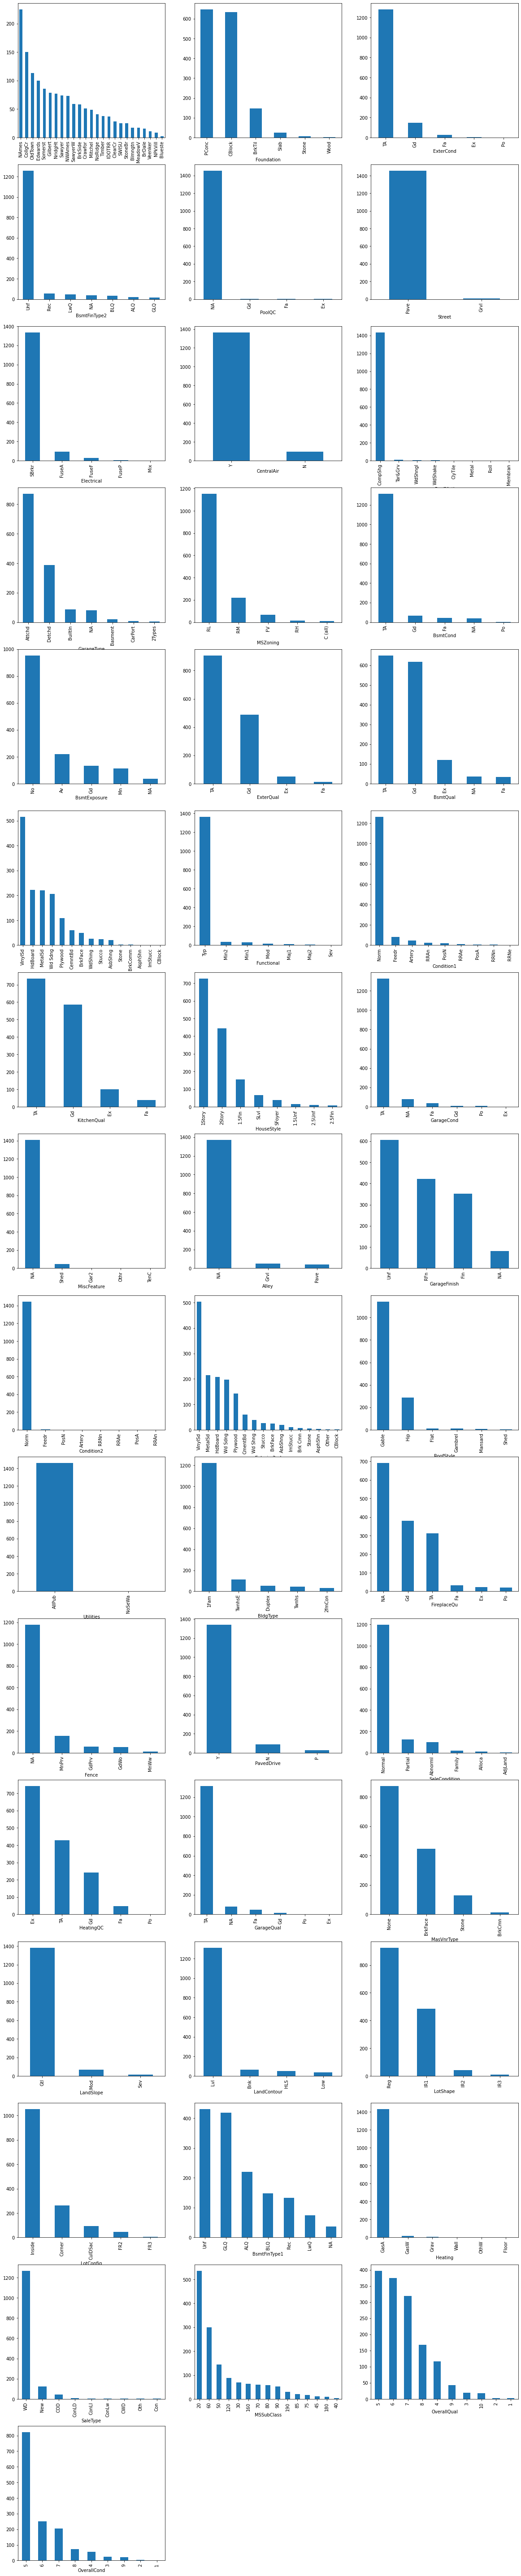

In [28]:
# now lets look at the distribution of categorical variables
plt.figure(figsize = (20, 105))
varCat = varCat + ['MSSubClass','OverallQual','OverallCond']
for col in varCat:
    ax = plt.subplot(16,3, varCat.index(col) + 1)
    df[col].value_counts().plot.bar(xlabel= col)
    #ax.set_xlable(col)
    

In [29]:
varNum

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'PropAge',
 'RemodAge',
 'GarageAge',
 'SaleYr']

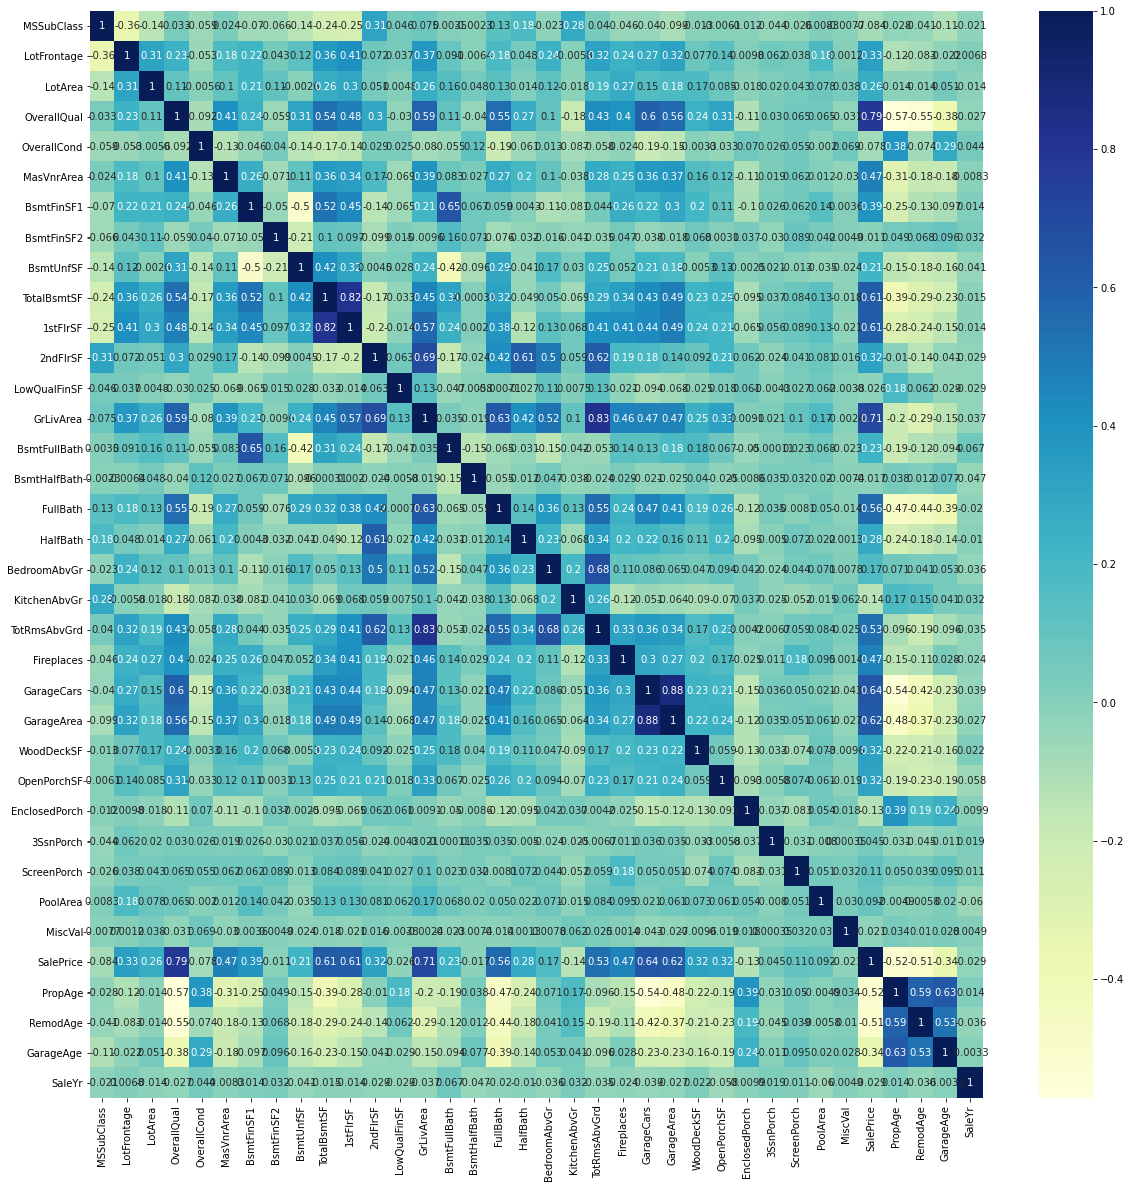

In [30]:
# heatmap of corelation
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

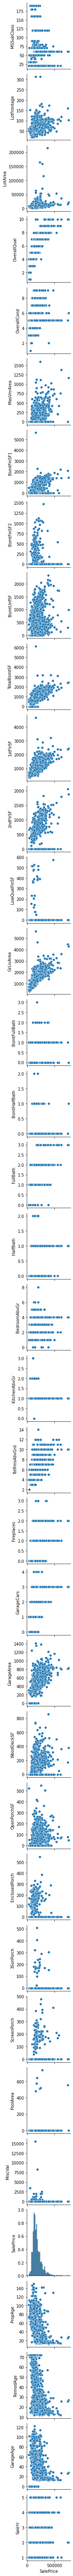

In [31]:
# creating pairplot for all the numeric variables
sns.pairplot(data = df[varNum],x_vars= 'SalePrice',y_vars = varNum)
plt.show()

From above analysis we can conclude SalePrice has high corelation with below fields
- OverallQual
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- GarageCars
- GarageArea

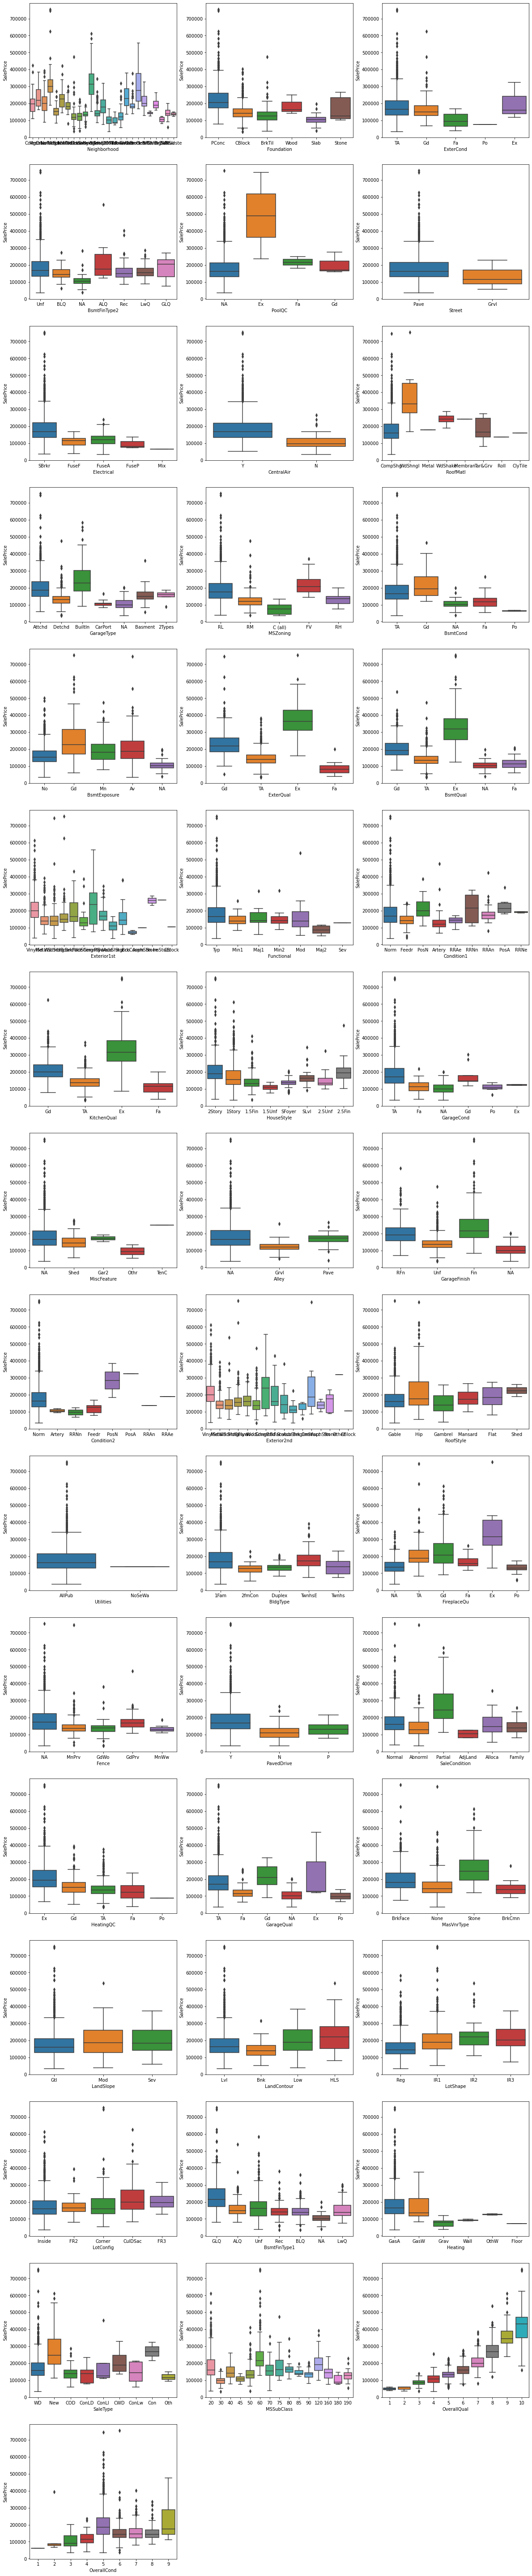

In [32]:
plt.figure(figsize=(20, 105))
for col in varCat:
    plt.subplot(16,3,varCat.index(col) + 1)
    sns.boxplot(x = col, y = 'SalePrice', data = df)
plt.show()

### Conclusion
SalePrice is high for 

1. Higher OverallQual
2. Excellent KitchenQual
3. New construction
4. Excellent ExterQual
5. Wood Shingles Roof material
6. Excellent HeatingQC
7. Paved Street
8. Excellent height of the basement
9. Excellent Pool quality
10. Excellent Fireplace quality
11. PavedDrive
12. attached/builtin GarageType
13. CentralAir
14. Finished Garage
15. Stone MasVnrType

In [33]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

### Data Preparation for model building
Variable Encoding and Dummy variable creationaccording to below plan

    OverallQual : already encoded
    OverallCond : already encoded
Encoding on 0-5 scale : 

    BsmtQual
    ExterCond
    HeatingQC
    GarageQual
    FireplaceQu
    BsmtCond
    KitchenQual
    ExterQual
    PoolQC
    GarageCond
    
       Ex	Excellent 	  : 5
       Gd	Good          : 4
       TA	Typical       : 3
       Fa	Fair          : 2
       Po	Poor          : 1
       NA	Not available : 0

Other encoding parameters :

    BsmtExposure
       Gd	Good Exposure           : 4
       Av	Average Exposure        : 3
       Mn	Mimimum Exposure        : 2
       No	No Exposure             : 1
       NA	No Basement             : 0
       
    LandSlope
       Gtl	Gentle slope            : 2
       Mod	Moderate Slope          : 1	
       Sev	Severe Slope            : 0
       
    Functional
        Typ	Typical Functionality   : 7
       Min1	Minor Deductions 1      : 6
       Min2	Minor Deductions 2      : 5
       Mod	Moderate Deductions     : 4
       Maj1	Major Deductions 1      : 3
       Maj2	Major Deductions 2      : 2
       Sev	Severely Damaged        : 1
       Sal	Salvage only            : 0
       
    GarageFinish
       Fin	Finished                : 3
       RFn	Rough Finished	        : 2
       Unf	Unfinished              : 1
       NA	No Garage               : 0
       
    CentralAir
       N	No                      : 0
       Y	Yes                     : 1
       
    PavedDrive
        Y	Paved                   : 2
       P	Partial Pavement        : 1
       N	Dirt/Gravel             : 0

Dummy variables for below fields

    LotShape
    Foundation
    RoofStyle 
    Alley     
    Fence
    RoofMatl
    BsmtFinType2
    SaleCondition
    Neighborhood
    BsmtFinType1
    Exterior2nd
    MasVnrType
    HouseStyle
    SaleType
    MiscFeature
    LandContour
    Street
    LotConfig
    MSZoning
    Exterior1st
    Condition1
    Electrical
    Heating
    BldgType
    Utilities
    Condition2
    GarageType
    MSSubClass

In [34]:
# Encoding the fiest set
varCatStr = """BsmtQual
    ExterCond
    HeatingQC
    GarageQual
    FireplaceQu
    BsmtCond
    KitchenQual
    ExterQual
    PoolQC
    GarageCond"""
varCatDuStr = """LotShape
    Foundation
    RoofStyle 
    Alley     
    Fence
    RoofMatl
    BsmtFinType2
    SaleCondition
    Neighborhood
    BsmtFinType1
    Exterior2nd
    MasVnrType
    HouseStyle
    SaleType
    MiscFeature
    LandContour
    Street
    LotConfig
    MSZoning
    Exterior1st
    Condition1
    Electrical
    Heating
    BldgType
    Utilities
    Condition2
    GarageType
    MSSubClass"""
varCat1 = varCatStr.split()
varDum1 = varCatDuStr.split()

In [35]:
# 0-5 maping
#   Ex    Excellent     : 5
#   Gd    Good          : 4
#   TA    Typical       : 3
#   Fa    Fair          : 2
#   Po    Poor          : 1
#   NA    Not available : 0
def map_0_5 (x):
    if x == "EX":
        return 5.0
    elif x == "Gd":
        return 4.0
    elif x == "TA":
        return 3.0
    elif x == "Fa":
        return 2.0
    elif x == "Po":
        return 1.0
    elif x == "NA":
        return 0.0

In [36]:
for col in varCat1:
    df[col]  = df[col].apply(lambda x:map_0_5(x))
    df[col].fillna(0, inplace = True)

In [37]:
df[varCat1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BsmtQual     1460 non-null   float64
 1   ExterCond    1460 non-null   float64
 2   HeatingQC    1460 non-null   float64
 3   GarageQual   1460 non-null   float64
 4   FireplaceQu  1460 non-null   float64
 5   BsmtCond     1460 non-null   float64
 6   KitchenQual  1460 non-null   float64
 7   ExterQual    1460 non-null   float64
 8   PoolQC       1460 non-null   float64
 9   GarageCond   1460 non-null   float64
dtypes: float64(10)
memory usage: 114.2 KB


In [38]:
# encoding BsmtExposure
#   Gd    Good Exposure           : 4
#   Av    Average Exposure        : 3
#   Mn    Mimimum Exposure        : 2
#   No    No Exposure             : 1
#   NA    No Basement             : 0
def map_BsmtExposure (x):
    if x == "Gd":
        return 4
    elif x == "Av":
        return 3
    elif x == "Mn":
        return 2
    elif x == "No":
        return 1
    elif x == "NA":
        return 0
col = 'BsmtExposure'
df[col]  = df[col].apply(lambda x:map_BsmtExposure(x))

In [39]:
# encoding LandSlope
#   Gtl    Gentle slope            : 2
#   Mod    Moderate Slope          : 1    
#   Sev    Severe Slope            : 0
def map_LandSlope (x):
    if x == "Gtl":
        return 2
    elif x == "Mod":
        return 1
    elif x == "Sev":
        return 0
col = 'LandSlope'
df[col]  = df[col].apply(lambda x:map_LandSlope(x))

In [40]:
# encoding Functional
#   Typ    Typical Functionality    : 7
#   Min1    Minor Deductions 1      : 6
#   Min2    Minor Deductions 2      : 5
#   Mod    Moderate Deductions      : 4
#   Maj1    Major Deductions 1      : 3
#   Maj2    Major Deductions 2      : 2
#   Sev    Severely Damaged         : 1
#   Sal    Salvage only             : 0
def map_Functional (x):
    if x == "Typ":
        return 7
    elif x == "Min1":
        return 5
    elif x == "Min2":
        return 5
    elif x == "Mod":
        return 4
    elif x == "Maj1":
        return 3
    elif x == "Maj2":
        return 2
    elif x == "Sev":
        return 1
    elif x == "Sal":
        return 0
col = 'Functional'
df[col]  = df[col].apply(lambda x:map_Functional(x))

In [41]:
# encoding GarageFinish
#   Fin    Finished                : 3
#   RFn    Rough Finished          : 2
#   Unf    Unfinished              : 1
#   NA    No Garage                : 0
def map_GarageFinish (x):
    if x == "Fin":
        return 3
    elif x == "RFn":
        return 2
    elif x == "Unf":
        return 1
    elif x == "NA":
        return 0
col = 'GarageFinish'
df[col]  = df[col].apply(lambda x:map_GarageFinish(x))


In [42]:
# encoding CentralAir
#   N    No                      : 0
#   Y    Yes                     : 1
def map_CentralAir (x):
    if x == "Y":
        return 1
    elif x == "N":
        return 0
col = 'CentralAir'
df[col]  = df[col].apply(lambda x:map_CentralAir(x))


In [43]:
# encoding PavedDrive
#   Y    Paved                    : 2
#   P    Partial Pavement         : 1
#   N    Dirt/Gravel              : 0
def map_PavedDrive (x):
    if x == "Y":
        return 2
    elif x == "P":
        return 1
    elif x == "N":
        return 0
col = 'PavedDrive'
df[col]  = df[col].apply(lambda x:map_PavedDrive(x))

In [44]:
# Creating Dummy variables and dropping original columns 
for col in varDum1:
    temp = pd.DataFrame()
    temp = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df,temp], axis = 1)
    df.drop([col], axis = 1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 230 entries, LotFrontage to 190
dtypes: float64(13), int64(38), uint8(179)
memory usage: 837.1 KB


In [46]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [47]:
df_train.head()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,PropAge,RemodAge,GarageAge,SaleYr,IR2,IR3,Reg,CBlock,PConc,Slab,Stone,Wood,Gable,Gambrel,Hip,Mansard,Shed,NA,Pave,GdWo,MnPrv,MnWw,NA,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,BLQ,GLQ,LwQ,NA,Rec,Unf,AdjLand,Alloca,Family,Normal,Partial,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BLQ,GLQ,LwQ,NA,Rec,Unf,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,NA,Othr,Shed,TenC,HLS,Low,Lvl,Pave,CulDSac,FR2,FR3,Inside,FV,RH,RL,RM,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall,2fmCon,Duplex,Twnhs,TwnhsE,NoSeWa,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,30,40,45,50,60,70,75,80,85,90,120,160,180,190
318,90.0,9900,1,7,5,256.0,4.0,3.0,4.0,3.0,4,987,0,360,1347,0.0,1,1372,1274,0,2646,1,0,2,1,4,1,4.0,9,7,1,3.0,2,3,656,3.0,3.0,2,340,60,144,0,0,0,0.0,0,260000,29,29,29.0,4,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
239,52.0,8741,2,6,4,0.0,3.0,3.0,3.0,2.0,1,94,0,641,735,3.0,1,798,689,0,1487,0,0,1,1,3,1,3.0,7,7,1,4.0,1,1,220,3.0,3.0,2,0,140,0,0,0,0,0.0,0,113000,77,72,73.0,5,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
986,59.0,5310,2,6,8,0.0,3.0,4.0,3.0,2.0,1,0,0,485,485,4.0,1,1001,634,0,1635,0,0,1,0,2,1,4.0,5,7,0,0.0,1,1,255,2.0,3.0,2,394,0,0,0,0,0,0.0,0,117000,112,19,72.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1416,60.0,11340,2,4,6,0.0,3.0,3.0,3.0,3.0,1,0,0,777,777,4.0,1,1246,1044,0,2290,0,0,2,0,4,2,3.0,11,7,0,0.0,1,2,560,3.0,3.0,0,0,0,114,0,0,0,0.0,0,122500,137,72,51.0,5,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
390,50.0,8405,2,5,8,0.0,3.0,3.0,3.0,4.0,1,241,391,229,861,0.0,1,961,406,0,1367,1,0,1,0,4,1,3.0,7,7,0,0.0,1,1,384,3.0,3.0,2,0,130,112,0,0,0,0.0,0,119000,122,72,44.0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [48]:
varNum = [ 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropAge', 'RemodAge',
 'GarageAge', 'SaleYr', 'BsmtQual', 'ExterCond', 'HeatingQC', 'GarageQual', 'FireplaceQu', 'BsmtCond', 'KitchenQual',
 'ExterQual', 'PoolQC', 'GarageCond', 'BsmtExposure', 'LandSlope', 'Functional', 'GarageFinish', 'CentralAir',
 'PavedDrive', 'BsmtQual', 'ExterCond', 'HeatingQC', 'GarageQual', 'FireplaceQu', 'BsmtCond', 'KitchenQual', 'ExterQual',
 'PoolQC', 'GarageCond', 'BsmtExposure', 'LandSlope', 'Functional', 'GarageFinish', 'CentralAir', 'PavedDrive',
 'BsmtExposure','LandSlope','Functional','GarageFinish','CentralAir','PavedDrive']+varCat1

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
df_train[varNum] = scaler.fit_transform(df_train[varNum])

In [51]:
df_train.head()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,PropAge,RemodAge,GarageAge,SaleYr,IR2,IR3,Reg,CBlock,PConc,Slab,Stone,Wood,Gable,Gambrel,Hip,Mansard,Shed,NA,Pave,GdWo,MnPrv,MnWw,NA,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,BLQ,GLQ,LwQ,NA,Rec,Unf,AdjLand,Alloca,Family,Normal,Partial,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BLQ,GLQ,LwQ,NA,Rec,Unf,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,NA,Othr,Shed,TenC,HLS,Low,Lvl,Pave,CulDSac,FR2,FR3,Inside,FV,RH,RL,RM,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall,2fmCon,Duplex,Twnhs,TwnhsE,NoSeWa,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,30,40,45,50,60,70,75,80,85,90,120,160,180,190
318,0.236301,0.039403,0.5,0.666667,0.500,0.16,1.00,0.75,1.00,0.75,1.00,0.174876,0.000000,0.154110,0.220458,0.00,1.0,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,1.00,0.545455,1.0,0.333333,0.75,0.666667,0.75,0.462623,0.75,0.75,1.0,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.0,0.312595,0.123188,0.283333,0.237705,0.75,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
239,0.106164,0.033981,1.0,0.555556,0.375,0.00,0.75,0.75,0.75,0.50,0.25,0.016655,0.000000,0.274401,0.120295,0.75,1.0,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.75,0.363636,1.0,0.333333,1.00,0.333333,0.25,0.155148,0.75,0.75,1.0,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.0,0.108457,0.471014,1.000000,0.598361,1.00,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
986,0.130137,0.017931,1.0,0.555556,0.875,0.00,0.75,1.00,0.75,0.50,0.25,0.000000,0.000000,0.207620,0.079378,1.00,1.0,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,1.00,0.181818,1.0,0.000000,0.00,0.333333,0.25,0.179831,0.50,0.75,1.0,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.114012,0.724638,0.116667,0.590164,0.00,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1416,0.133562,0.046139,1.0,0.333333,0.625,0.00,0.75,0.75,0.75,0.75,0.25,0.000000,0.000000,0.332620,0.127169,1.00,1.0,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.75,0.727273,1.0,0.000000,0.00,0.333333,0.50,0.394922,0.75,0.75,0.0,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.0,0.1

In [52]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1021.0,0.166956,0.075649,0.0,0.133562,0.167979,0.195205,1.0
LotArea,1021.0,0.042162,0.048221,0.0,0.027937,0.037555,0.046943,1.0
LandSlope,1021.0,0.967679,0.141537,0.0,1.000000,1.000000,1.000000,1.0
OverallQual,1021.0,0.565894,0.155515,0.0,0.444444,0.555556,0.666667,1.0
OverallCond,1021.0,0.572600,0.136515,0.0,0.500000,0.500000,0.625000,1.0
MasVnrArea,1021.0,0.065306,0.117088,0.0,0.000000,0.000000,0.098750,1.0
ExterQual,1021.0,0.805828,0.195708,0.0,0.750000,0.750000,1.000000,1.0
ExterCond,1021.0,0.770323,0.091372,0.0,0.750000,0.750000,0.750000,1.0
BsmtQual,1021.0,0.763467,0.302566,0.0,0.750000,0.750000,1.000000,1.0
BsmtCond,1021.0,0.732125,0.144291,0.0,0.750000,0.750000,0.750000,1.0


In [53]:
y_train = df_train.pop('SalePrice')
X_train = df_train

## Model building

In [54]:
import statsmodels.api as sm

# adding a constant to only temp as it has the highest corelation
X_train_lm = sm.add_constant(X_train)

# Create first fitted model
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     66.28
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:55:35   Log-Likelihood:                 2313.2
No. Observations:                1021   AIC:                            -4186.
Df Residuals:                     801   BIC:                            -3102.
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0473      0.187     -5.592      0.000      -1.415      -0.680
LotFrontage       0.0479      0.020      2.341      0.019       0.008       0.088
LotArea           0.1497      0.031      4.880      0.000       0.089       0.210
LandSlope         0.0015      0.011      0.137      0.891      -0.020       0.023
OverallQual       0.0918      0.014      6.626      0.000       0.065       0.119
OverallCond       0.0688      0.011      6.253      0.000       0.047       0.090
MasVnrArea        0.0540      0.013      4.046      0.000       0.028       0.080
ExterQual        -0.0209      0.007     -3.167      0.002      -0.034      -0.008
ExterCond        -0.0129      0.012     -1.032      0.302      -0.037       0.012
BsmtQual         -0.0323      0.005     -6.973      0.000      -0.041      -0.023
BsmtCond         -0.0136      0.015     -0.889      0.374      -0.044       0.016
BsmtExposure      0.0276      0.005      5.284      0.000       0.017       0.038
BsmtFinSF1        0.1883      0.023      8.209      0.000       0.143       0.233
BsmtFinSF2        0.0375      0.017      2.193      0.029       0.004       0.071
BsmtUnfSF         0.0210      0.010      2.037      0.042       0.001       0.041
TotalBsmtSF       0.1910      0.024      7.962      0.000       0.144       0.238
HeatingQC        -0.0044      0.003     -1.448      0.148      -0.010       0.002
CentralAir       -0.0024      0.006     -0.405      0.686      -0.014       0.009
1stFlrSF          0.1623      0.022      7.270      0.000       0.118       0.206
2ndFlrSF          0.1449      0.017      8.712      0.000       0.112       0.178
LowQualFinSF     -0.0181      0.014     -1.321      0.187      -0.045       0.009
GrLivArea         0.2037      0.018     11.500      0.000       0.169       0.238
BsmtFullBath      0.0136      0.009      1.557      0.120      -0.004       0.031
BsmtHalfBath     -0.0074      0.009     -0.813      0.417      -0.025       0.010
FullBath          0.0009      0.010      0.088      0.930      -0.019       0.021
HalfBath         -0.0103      0.007     -1.554      0.121      -0.023       0.003
BedroomAbvGr     -0.0411      0.017     -2.375      0.018      -0.075      -0.007
KitchenAbvGr     -0.0443      0.020     -2.225      0.026      -0.083      -0.005
KitchenQual      -0.0316      0.005     -6.338      0.000      -0.041      -0.022
TotRmsAbvGrd     -0.0009      0.017     -0.054      0.957      -0.033       0.032
Functional        0.0526      0.010      5.011      0.000       0.032       0.073
Fireplaces        0.0106      0.009      1.144      0.253      -0.008       0.029
FireplaceQu      -0.0028      0.004     -0.642      0.521      -0.011       0.006
GarageFinish      0.0003      0.006      0.059      0.953      -0.011       0.011
GarageCars        0.0329      0.014      2.292   

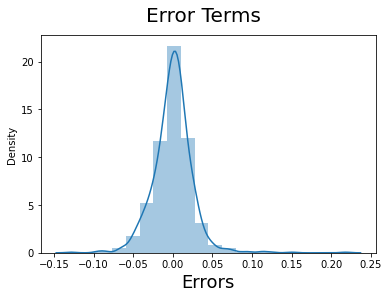

In [56]:
y_train_pred = lr_model.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()

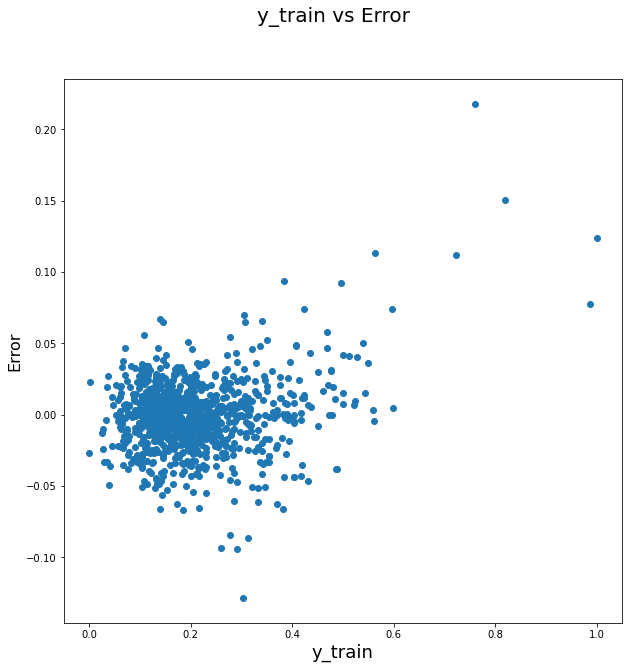

In [57]:
fig = plt.figure(figsize = (10,10))
plt.scatter(y_train,y_train - y_train_pred  )
fig.suptitle('y_train vs Error', fontsize=20)              
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

In [58]:
# Creating test variables
df_test[varNum] = scaler.transform(df_test[varNum])
y_test = df_test.pop('SalePrice')
X_test = df_test
X_test_lm = sm.add_constant(X_test)



Test R2 for 1st model 0.8142568975550404


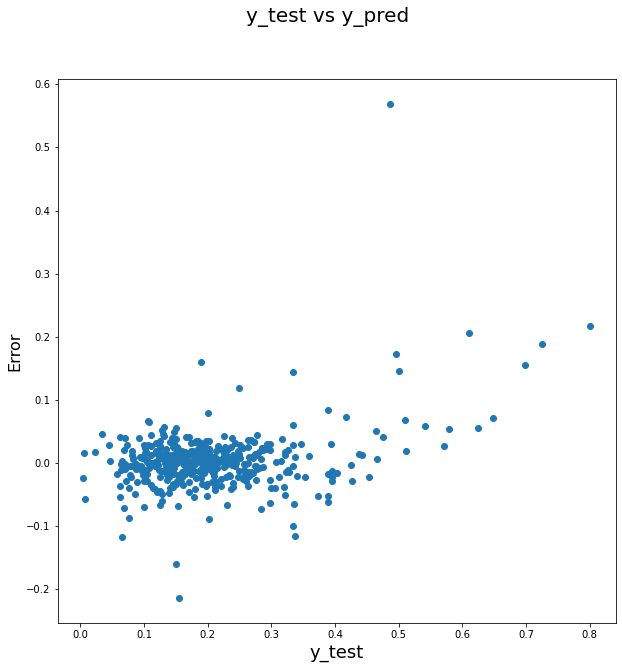

In [59]:
# Testig the first model creatied using adding variable one by one
y_test_pred = lr_model.predict(X_test_lm)
print("\n\nTest R2 for 1st model {}".format(r2_score(y_test, y_test_pred)))

fig = plt.figure(figsize = (10,10))
plt.scatter(y_test,y_test- y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

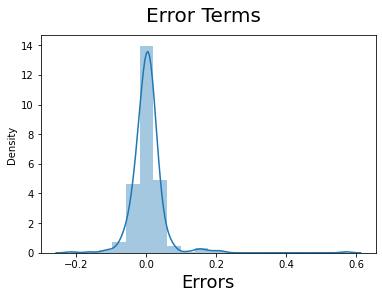

In [60]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()

In [61]:
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)
rss1_lr = np.sum(np.square(y_train - y_train_pred))
rss2_lr = np.sum(np.square(y_test - y_test_pred))
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)

print(r2_train_lr)
print(r2_test_lr)
print(rss1_lr)
print(rss2_lr)
print(mse_train_lr)
print(mse_test_lr)


0.9477052210799592
0.8142568975550404
0.6436054963502718
1.012178222241596
0.0006303677731148597
0.0023056451531699228


The model R2 score is good but the error term is clearly following a pattern

### Using RFE for feature elemination

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [64]:
# rank of variables according to RFE
sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), key = lambda x: x[2])

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Functional', True, 1),
 ('GarageCars', True, 1),
 ('PoolArea', True, 1),
 ('PoolQC', True, 1),
 ('PropAge', True, 1),
 ('GarageAge', True, 1),
 ('Stone', True, 1),
 ('Wood', True, 1),
 ('Shed', True, 1),
 ('CompShg', True, 1),
 ('Membran', True, 1),
 ('Metal', True, 1),
 ('Roll', True, 1),
 ('Tar&Grv', True, 1),
 ('WdShake', True, 1),
 ('WdShngl', True, 1),
 ('NA', True, 1),
 ('AdjLand', True, 1),
 ('Partial', True, 1),
 ('Crawfor', True, 1),
 ('NoRidge', True, 1),
 ('NA', True, 1),
 ('CBlock', True, 1),
 ('Con', True, 1),
 ('New', True, 1),
 ('Pave', True, 1),
 ('CBlock', 

In [65]:
X_train.columns[rfe.support_]

Index([     'LotArea',  'OverallQual',  'OverallCond',     'BsmtQual',
       'BsmtExposure',   'BsmtFinSF1',   'BsmtFinSF2',    'BsmtUnfSF',
        'TotalBsmtSF',     '1stFlrSF',     '2ndFlrSF', 'LowQualFinSF',
          'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',  'KitchenQual',
         'Functional',   'GarageCars',     'PoolArea',       'PoolQC',
            'PropAge',    'GarageAge',        'Stone',         'Wood',
               'Shed',      'CompShg',      'Membran',        'Metal',
               'Roll',      'Tar&Grv',      'WdShake',      'WdShngl',
                 'NA',      'AdjLand',      'Partial',      'Crawfor',
            'NoRidge',           'NA',       'CBlock',          'Con',
                'New',         'Pave',       'CBlock',        'FuseP',
               'OthW',         'Wall',         'PosA',         'PosN',
               'RRAe',             75],
      dtype='object')

In [66]:
# Variable selection from RFE
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,GarageCars,PoolArea,PoolQC,PropAge,GarageAge,Stone,Stone,Stone,Stone,Wood,Shed,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,NA,NA,NA,NA,NA,NA,AdjLand,Partial,Crawfor,NoRidge,NA,NA,NA,NA,NA,NA,CBlock,CBlock,CBlock,Con,New,Pave,Pave,CBlock,CBlock,CBlock,FuseP,OthW,Wall,PosA,PosA,PosN,PosN,RRAe,RRAe,75
318,0.039403,0.666667,0.500,1.00,1.00,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.500,0.0,1.00,1.0,0.75,0.0,0.0,0.123188,0.237705,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
239,0.033981,0.555556,0.375,0.75,0.25,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.375,0.0,0.75,1.0,0.25,0.0,0.0,0.471014,0.598361,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
986,0.017931,0.555556,0.875,0.75,0.25,0.000000,0.000000,0.207620,0.079378,0.145602,0.307022,0.0,0.230015,0.250,0.0,1.00,1.0,0.25,0.0,0.0,0.724638,0.590164,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1416,0.046139,0.333333,0.625,0.75,0.25,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.500,0.5,0.75,1.0,0.50,0.0,0.0,0.905797,0.418033,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
390,0.032409,0.444444,0.875,0.75,0.25,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.500,0.0,0.75,1.0,0.25,0.0,0.0,0.797101,0.360656,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lr_model_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [69]:
lr_model_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:55:43   Log-Likelihood:                 2129.0
No. Observations:                1021   AIC:                            -4138.
Df Residuals:                     961   BIC:                            -3842.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0037      0.089    -11.305      0.000      -1.178      -0.830
LotArea          0.1645      0.023      7.018      0.000       0.119       0.211
OverallQual      0.1128      0.012      9.334      0.000       0.089       0.137
OverallCond      0.0836      0.009      9.635      0.000       0.067       0.101
BsmtQual        -0.0416      0.004     -9.723      0.000      -0.050      -0.033
BsmtExposure     0.0282      0.004      6.419      0.000       0.020       0.037
BsmtFinSF1       0.2185      0.019     11.589      0.000       0.182       0.256
BsmtFinSF2       0.0314      0.010      3.241      0.001       0.012       0.050
BsmtUnfSF        0.0373      0.008      4.421      0.000       0.021       0.054
TotalBsmtSF      0.2237      0.021     10.896      0.000       0.183       0.264
1stFlrSF         0.1932      0.017     11.096      0.000       0.159       0.227
2ndFlrSF         0.1223      0.008     16.180      0.000       0.107       0.137
LowQualFinSF    -0.0237      0.011     -2.089      0.037      -0.046      -0.001
GrLivArea        0.2193      0.013     16.571      0.000       0.193       0.245
BedroomAbvGr    -0.0663      0.013     -5.092      0.000      -0.092      -0.041
KitchenAbvGr    -0.0912      0.010     -8.699      0.000      -0.112      -0.071
KitchenQual     -0.0392      0.005     -8.635      0.000      -0.048      -0.030
Functional       0.0553      0.010      5.759      0.000       0.036       0.074
GarageCars       0.0408      0.010      4.275      0.000       0.022       0.060
PoolArea         0.1262      0.029      4.385      0.000       0.070       0.183
PoolQC          -0.1904      0.085     -2.248      0.025      -0.357      -0.024
PropAge         -0.0811      0.010     -8.118      0.000      -0.101      -0.061
GarageAge       -0.0169      0.010     -1.766      0.078      -0.036       0.002
Stone            0.0250      0.020      1.263      0.207      -0.014       0.064
Stone            0.0267      0.022      1.232      0.218      -0.016       0.069
Stone            0.0088      0.004      2.275      0.023       0.001       0.016
Stone           -0.0492      0.028     -1.730      0.084      -0.105       0.007
Wood            -0.0356      0.023     -1.583      0.114      -0.080       0.009
Shed             0.0219      0.038      0.573      0.567      -0.053       0.097
Shed            -0.0086      0.019     -0.448      0.654      -0.046       0.029
CompShg          0.9099      0.084     10.889      0.000       0.746       1.074
Membran          0.9760      0.090     10.840      0.000       0.799       1.153
Metal            0.9260      0.089     10.373      0.000       0.751       1.101
Roll             0.9062      0.089     10.142      0.000       0.731       1.082
Tar&Grv          0.9031      0.085     10.686      0.000       0.737       1.069
WdSha



Test R2 for 1st model 0.7939900413803492


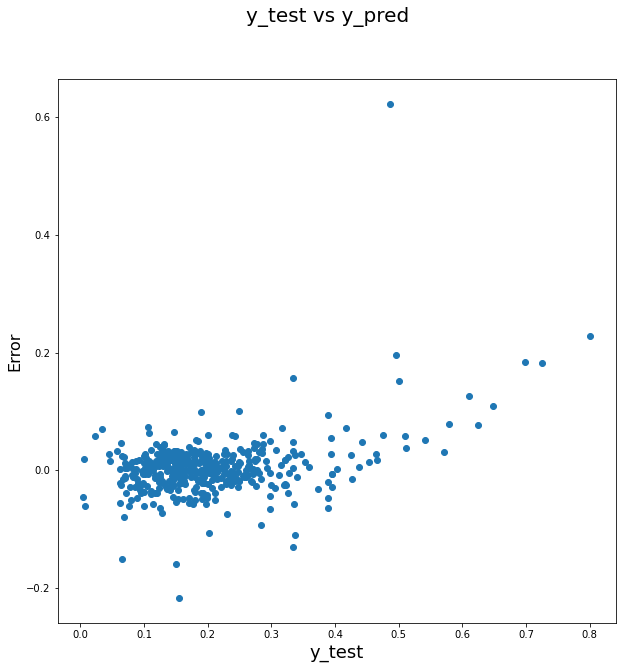

In [70]:
X_test_rfe = X_test[X_test.columns[rfe.support_]]
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_pred = lr_model_rfe.predict(X_test_rfe)
print("\n\nTest R2 for 1st model {}".format(r2_score(y_test, y_test_pred)))

fig = plt.figure(figsize = (10,10))
plt.scatter(y_test,y_test- y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

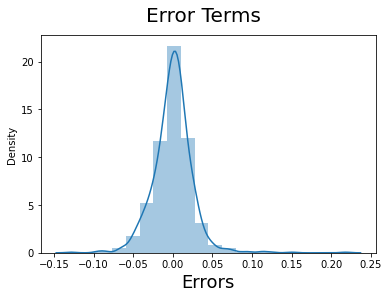

In [71]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()

With 50 features the train R2 score it still good, lets tune the model for identifying a good value of feature to select

In [72]:
rfe_dict = {"features_to_select":[], "Train R2":[], "Test R2":[], "Train RSS":[], "Test RSS":[], "Train MSE":[],
            "Test MSE":[]}
for fts in range(10, 51):
    rfe_dict["features_to_select"].append(fts)
    rfe = RFE(lm, fts)
    rfe = rfe.fit(X_train, y_train)
    X_train_rfe = X_train[X_train.columns[rfe.support_]]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lr_model_rfe = sm.OLS(y_train,X_train_rfe).fit()
    y_train_pred = lr_model_rfe.predict(X_train_rfe)
    X_test_rfe = X_test[X_test.columns[rfe.support_]]
    X_test_rfe = sm.add_constant(X_test_rfe)
    y_test_pred = lr_model_rfe.predict(X_test_rfe)
    rfe_dict["Train R2"].append(r2_score(y_train, y_train_pred))
    rfe_dict["Test R2"].append(r2_score(y_test, y_test_pred))
    rfe_dict["Train RSS"].append(np.sum(np.square(y_train - y_train_pred)))
    rfe_dict["Test RSS"].append(np.sum(np.square(y_test - y_test_pred)))
    rfe_dict["Train MSE"].append(mean_squared_error(y_train, y_train_pred))
    rfe_dict["Test MSE"].append(mean_squared_error(y_test, y_test_pred))
    #print("Model with n_features_to_select = {}, Train R2 : {}, test R2 : {} ".format(fts, r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
ref_df = pd.DataFrame(rfe_dict)

In [73]:
ref_df

,features_to_select,Train R2,Test R2,Train RSS,Test RSS,Train MSE,Test MSE
0,10,0.734257,0.667897,3.270568,1.809743,0.003203,0.004122
1,11,0.755923,0.688177,3.003914,1.699231,0.002942,0.003871
2,12,0.757722,0.687753,2.981778,1.701540,0.002920,0.003876
3,13,0.758979,0.686778,2.966308,1.706854,0.002905,0.003888
4,14,0.836074,0.728033,2.017476,1.482045,0.001976,0.003376
5,15,0.839418,0.732870,1.976326,1.455682,0.001936,0.003316
6,16,0.845709,0.738518,1.898899,1.424906,0.001860,0.003246
7,17,0.851324,0.738360,1.829791,1.425767,0.001792,0.003248
8,18,0.858068,0.737789,1.746798,1.428878,0.001711,0.003255
9,19,0.858437,0.737728,1.742256,1.429209,0.001706,0.003256


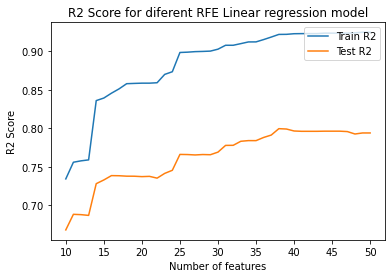

In [74]:
plt.plot(ref_df['features_to_select'], ref_df['Train R2'])
plt.plot(ref_df['features_to_select'], ref_df['Test R2'])
plt.xlabel('Number of features')
plt.ylabel('R2 Score')
plt.title("R2 Score for diferent RFE Linear regression model")
plt.legend(['Train R2', 'Test R2'], loc='upper right')
plt.show()

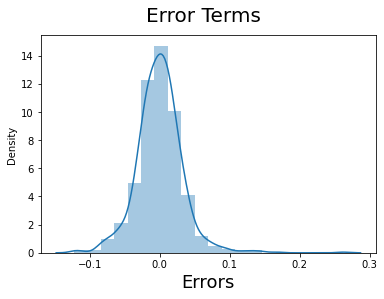

In [123]:
# perform RFE with 32 feature
rfe = RFE(lm, 32)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model_rfe = sm.OLS(y_train,X_train_rfe).fit()
y_train_pred = lr_model_rfe.predict(X_train_rfe)
X_test_rfe = X_test[X_test.columns[rfe.support_]]
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_pred = lr_model_rfe.predict(X_test_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()



Test R2 for 1st model 0.7779246648810261


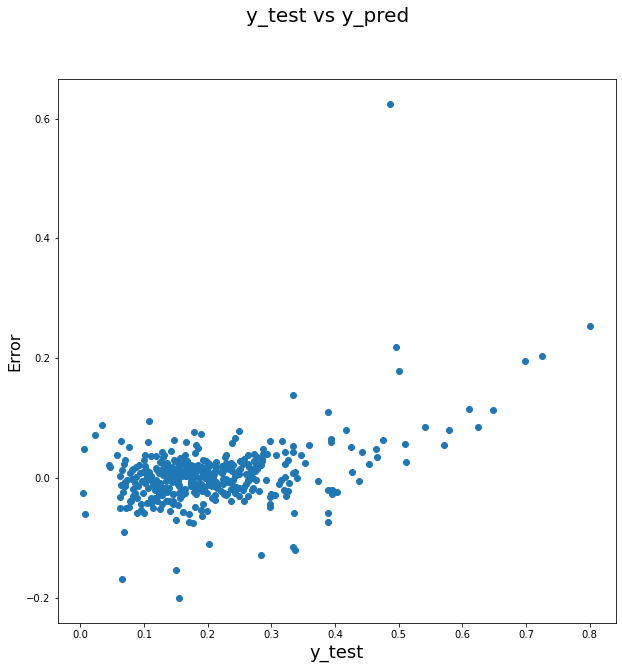

In [124]:
print("\n\nTest R2 for 1st model {}".format(r2_score(y_test, y_test_pred)))

fig = plt.figure(figsize = (10,10))
plt.scatter(y_test,y_test- y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

In [125]:
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)
rss1_lr = np.sum(np.square(y_train - y_train_pred))
rss2_lr = np.sum(np.square(y_test - y_test_pred))
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)

print(r2_train_lr)
print(r2_test_lr)
print(rss1_lr)
print(rss2_lr)
print(mse_train_lr)
print(mse_test_lr)

rfe_met = [32, r2_train_lr,r2_test_lr,rss1_lr,rss2_lr,mse_train_lr,mse_test_lr,32]

0.9080391897989996
0.7779246648810261
1.131785698619833
1.2101650879393357
0.0011085070505581125
0.002756640291433567


## Ridge Regression

In [78]:
X_train.head()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,PropAge,RemodAge,GarageAge,SaleYr,IR2,IR3,Reg,CBlock,PConc,Slab,Stone,Wood,Gable,Gambrel,Hip,Mansard,Shed,NA,Pave,GdWo,MnPrv,MnWw,NA,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,BLQ,GLQ,LwQ,NA,Rec,Unf,AdjLand,Alloca,Family,Normal,Partial,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BLQ,GLQ,LwQ,NA,Rec,Unf,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,NA,Othr,Shed,TenC,HLS,Low,Lvl,Pave,CulDSac,FR2,FR3,Inside,FV,RH,RL,RM,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall,2fmCon,Duplex,Twnhs,TwnhsE,NoSeWa,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,30,40,45,50,60,70,75,80,85,90,120,160,180,190
318,0.236301,0.039403,0.5,0.666667,0.500,0.16,1.00,0.75,1.00,0.75,1.00,0.174876,0.000000,0.154110,0.220458,0.00,1.0,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,1.00,0.545455,1.0,0.333333,0.75,0.666667,0.75,0.462623,0.75,0.75,1.0,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.0,0.123188,0.283333,0.237705,0.75,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
239,0.106164,0.033981,1.0,0.555556,0.375,0.00,0.75,0.75,0.75,0.50,0.25,0.016655,0.000000,0.274401,0.120295,0.75,1.0,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.75,0.363636,1.0,0.333333,1.00,0.333333,0.25,0.155148,0.75,0.75,1.0,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.0,0.471014,1.000000,0.598361,1.00,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
986,0.130137,0.017931,1.0,0.555556,0.875,0.00,0.75,1.00,0.75,0.50,0.25,0.000000,0.000000,0.207620,0.079378,1.00,1.0,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,1.00,0.181818,1.0,0.000000,0.00,0.333333,0.25,0.179831,0.50,0.75,1.0,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.724638,0.116667,0.590164,0.00,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1416,0.133562,0.046139,1.0,0.333333,0.625,0.00,0.75,0.75,0.75,0.75,0.25,0.000000,0.000000,0.332620,0.127169,1.00,1.0,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.75,0.727273,1.0,0.000000,0.00,0.333333,0.50,0.394922,0.75,0.75,0.0,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.0,0.905797,1.000000,0.418033,1.00,0,0,1,0,

In [79]:
y_train.head()

318     0.312595
239     0.108457
986     0.114012
1416    0.121650
390     0.116789
Name: SalePrice, dtype: float64

In [80]:
from sklearn.linear_model import Ridge

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cvr = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cvr.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# display the mean scores

ridge_cv_results = pd.DataFrame(model_cvr.cv_results_)

ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.2,-0.017874,-0.026300,1
4,0.1,-0.017373,-0.026337,2
6,0.3,-0.018280,-0.026373,3
7,0.4,-0.018603,-0.026452,4
3,0.05,-0.017096,-0.026492,5
8,0.5,-0.018869,-0.026515,6
9,0.6,-0.019092,-0.026559,7
10,0.7,-0.019281,-0.026591,8
11,0.8,-0.019447,-0.026618,9
12,0.9,-0.019591,-0.026639,10


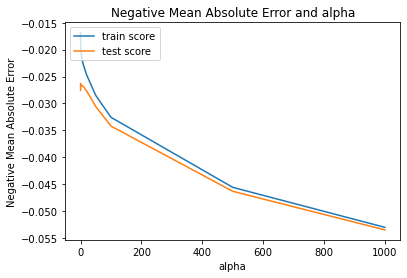

In [82]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [83]:
# Printing the best hyperparameter alpha
print(model_cvr.best_params_)

{'alpha': 0.2}


In [126]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.2

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
rss2_lr = np.sum(np.square(y_test - y_pred_test))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)

print(r2_train_lr)
print(r2_test_lr)
print(rss1_lr)
print(rss2_lr)
print(mse_train_lr)
print(mse_test_lr)

ridge_met = [alpha, r2_train_lr,r2_test_lr,rss1_lr,rss2_lr,mse_train_lr,mse_test_lr, len(ridge.coef_)]

0.9384277120977049
0.7898592181936867
0.7577862214002377
1.145129591082402
0.0007422000209600761
0.0026084956516683414


In [85]:
coef_df = pd.DataFrame(ridge.coef_, index = X_train.columns, columns = ["Coefficient"])
ridge_coef_plt = coef_df[coef_df["Coefficient"] != 0].sort_values(by = "Coefficient", ascending = False)
print("Top 5 fields")
ridge_coef_plt.head()

Top 5 fields


,Coefficient
WdShngl,0.212476
PoolArea,0.173829
GrLivArea,0.171297
1stFlrSF,0.145609
2ndFlrSF,0.131303


In [86]:
print("Top 5 fields(-ve coeff)")
ridge_coef_plt.tail()

Top 5 fields(-ve coeff)


,Coefficient
BsmtQual,-0.037681
OthW,-0.047759
PropAge,-0.050006
PosN,-0.396491
PoolQC,-0.515021


In [87]:
ridge_coef_plt.shape

(226, 1)

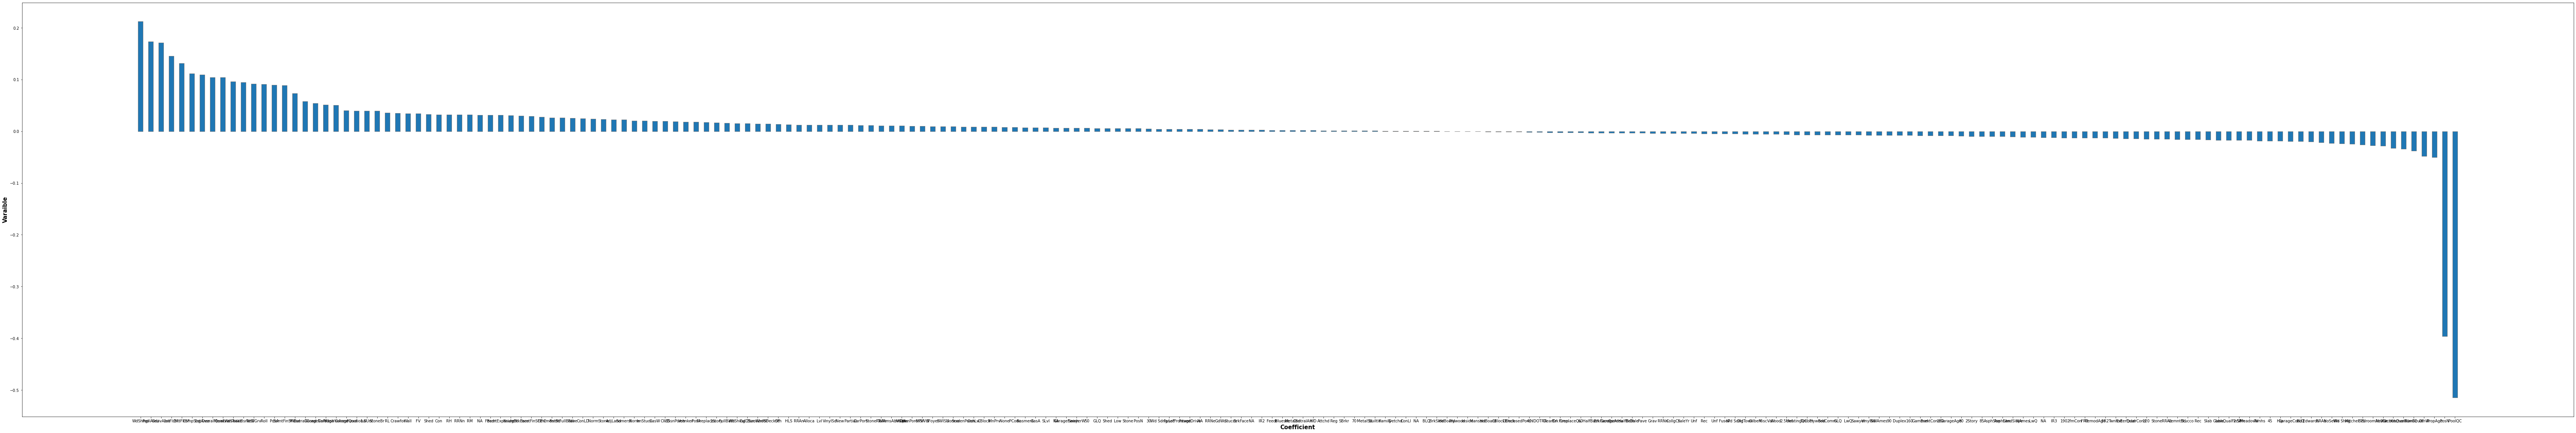

In [88]:
# ploting Top 5 coef 
ridge_coef_plt = ridge_coef_plt[ridge_coef_plt["Coefficient"] != 0].sort_values(by = "Coefficient", ascending = False)
plt.figure(figsize= (120,20))

br1 = np.arange(226)
plt.bar(br1, ridge_coef_plt["Coefficient"],  width = 0.5,
        edgecolor ='grey',)
plt.xlabel('Coefficient', fontweight ='bold', fontsize = 15)
plt.ylabel('Varaible', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(226)],
        list(ridge_coef_plt.index))
plt.show()

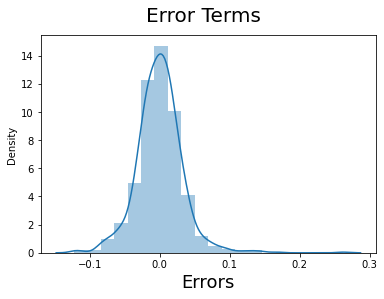

In [89]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()



Test R2 for 1st model 0.7779246648810261


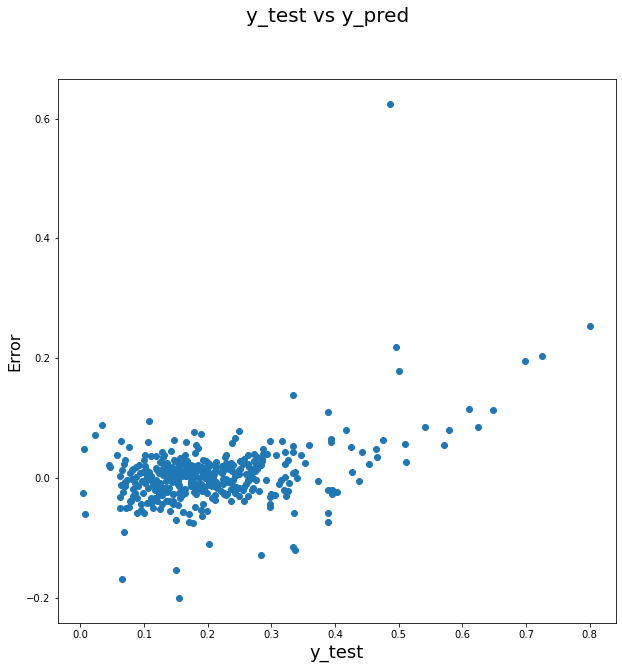

In [90]:
print("\n\nTest R2 for 1st model {}".format(r2_score(y_test, y_test_pred)))

fig = plt.figure(figsize = (10,10))
plt.scatter(y_test,y_test- y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

Optimal value of Alpha : 0.0001
most important predictor variables:

    PoolQC: Pool quality
    Proximity to various conditions (Near positive off-site feature--park, greenbelt, etc.)
    RoofMatl: Roof material(WdShngl	Wood Shingles)
    Heating: Type of heating (Hot water or steam heat other than gas)
    GrLivArea: Above grade (ground) living area square feet

## Lasso Regression

In [91]:
X_train.head()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,PropAge,RemodAge,GarageAge,SaleYr,IR2,IR3,Reg,CBlock,PConc,Slab,Stone,Wood,Gable,Gambrel,Hip,Mansard,Shed,NA,Pave,GdWo,MnPrv,MnWw,NA,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,BLQ,GLQ,LwQ,NA,Rec,Unf,AdjLand,Alloca,Family,Normal,Partial,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BLQ,GLQ,LwQ,NA,Rec,Unf,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,NA,Othr,Shed,TenC,HLS,Low,Lvl,Pave,CulDSac,FR2,FR3,Inside,FV,RH,RL,RM,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall,2fmCon,Duplex,Twnhs,TwnhsE,NoSeWa,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,30,40,45,50,60,70,75,80,85,90,120,160,180,190
318,0.236301,0.039403,0.5,0.666667,0.500,0.16,1.00,0.75,1.00,0.75,1.00,0.174876,0.000000,0.154110,0.220458,0.00,1.0,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,1.00,0.545455,1.0,0.333333,0.75,0.666667,0.75,0.462623,0.75,0.75,1.0,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.0,0.123188,0.283333,0.237705,0.75,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
239,0.106164,0.033981,1.0,0.555556,0.375,0.00,0.75,0.75,0.75,0.50,0.25,0.016655,0.000000,0.274401,0.120295,0.75,1.0,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.75,0.363636,1.0,0.333333,1.00,0.333333,0.25,0.155148,0.75,0.75,1.0,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.0,0.471014,1.000000,0.598361,1.00,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
986,0.130137,0.017931,1.0,0.555556,0.875,0.00,0.75,1.00,0.75,0.50,0.25,0.000000,0.000000,0.207620,0.079378,1.00,1.0,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,1.00,0.181818,1.0,0.000000,0.00,0.333333,0.25,0.179831,0.50,0.75,1.0,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.724638,0.116667,0.590164,0.00,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1416,0.133562,0.046139,1.0,0.333333,0.625,0.00,0.75,0.75,0.75,0.75,0.25,0.000000,0.000000,0.332620,0.127169,1.00,1.0,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.75,0.727273,1.0,0.000000,0.00,0.333333,0.50,0.394922,0.75,0.75,0.0,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.0,0.905797,1.000000,0.418033,1.00,0,0,1,0,

In [92]:
y_train.head()

318     0.312595
239     0.108457
986     0.114012
1416    0.121650
390     0.116789
Name: SalePrice, dtype: float64

In [93]:
from sklearn.linear_model import Lasso

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# display the mean scores

lasso_cv_results = pd.DataFrame(model_cv.cv_results_)

lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.019201,-0.023957,1
1,0.001,-0.028339,-0.029685,2
2,0.01,-0.057026,-0.057521,3
25,100,-0.079932,-0.080014,4
24,50,-0.079932,-0.080014,4
23,20,-0.079932,-0.080014,4
22,10.0,-0.079932,-0.080014,4
21,9.0,-0.079932,-0.080014,4
20,8.0,-0.079932,-0.080014,4
19,7.0,-0.079932,-0.080014,4


In [95]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [96]:
lasso_cv_results['param_alpha']

0     0.0001
1      0.001
2       0.01
3       0.05
4        0.1
5        0.2
6        0.3
7        0.4
8        0.5
9        0.6
10       0.7
11       0.8
12       0.9
13       1.0
14       2.0
15       3.0
16       4.0
17       5.0
18       6.0
19       7.0
20       8.0
21       9.0
22      10.0
23        20
24        50
25       100
26       500
27      1000
Name: param_alpha, dtype: object

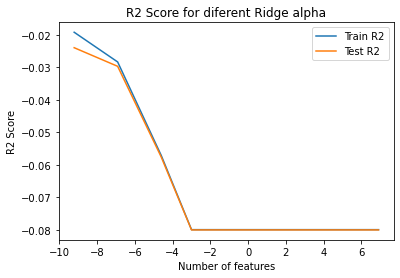

In [97]:
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')


plt.plot(np.log(lasso_cv_results['param_alpha']), lasso_cv_results['mean_train_score'])
plt.plot(np.log(lasso_cv_results['param_alpha']), lasso_cv_results['mean_test_score'])
plt.xlabel('Number of features')
plt.ylabel('R2 Score')
plt.title("R2 Score for diferent Ridge alpha")
plt.legend(['Train R2', 'Test R2'], loc='upper right')
plt.show()

In [98]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
rss2_lr = np.sum(np.square(y_test - y_pred_test))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)

print(r2_train_lr)
print(r2_test_lr)
print(rss1_lr)
print(rss2_lr)
print(mse_train_lr)
print(mse_test_lr)


0.926405206260383
0.7658463523287313
0.9057503393599798
1.2759839784711273
0.000887120802507326
0.0029065694270412924


In [99]:
from sklearn.linear_model import Lasso

params = {'alpha': [0.0001,0.0002, 0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# display the mean scores

lasso_cv_results = pd.DataFrame(model_cv.cv_results_)

lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.019201,-0.023957,1
1,0.0002,-0.020946,-0.024753,2
2,0.0003,-0.022536,-0.025829,3
3,0.0004,-0.023957,-0.026615,4
4,0.0005,-0.025095,-0.027265,5
5,0.0006,-0.025969,-0.027853,6
6,0.0007,-0.026719,-0.028381,7
7,0.0008,-0.027310,-0.028854,8
8,0.0009,-0.027834,-0.029277,9
9,0.001,-0.028339,-0.029685,10


In [101]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


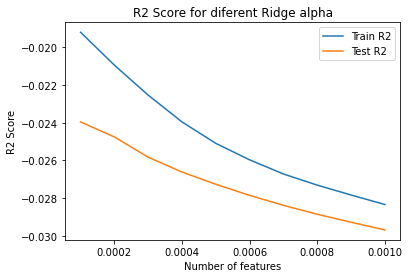

In [102]:
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('Number of features')
plt.ylabel('R2 Score')
plt.title("R2 Score for diferent Ridge alpha")
plt.legend(['Train R2', 'Test R2'], loc='upper right')
plt.show()

In [127]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
r2_test_lr = r2_score(y_test, y_pred_test)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
rss2_lr = np.sum(np.square(y_test - y_pred_test))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)

print(r2_train_lr)
print(r2_test_lr)
print(rss1_lr)
print(rss2_lr)
print(mse_train_lr)
print(mse_test_lr)

lasso_met = [alpha, r2_train_lr,r2_test_lr,rss1_lr,rss2_lr,mse_train_lr,mse_test_lr, len([e for e in lasso.coef_ if e != 0])]

0.826326197613724
0.8083136677964986
2.1374488256039283
1.044564930830986
0.0020934856274279416
0.002379418976835959


#### Lasso interpretation

In [104]:
lasso_cv_results.shape

(10, 21)

In [105]:
coef_df = pd.DataFrame(lasso.coef_, index = X_train.columns, columns = ["Coefficient"])
lasso_coef_plt = coef_df[coef_df["Coefficient"] != 0].sort_values(by = "Coefficient", ascending = False)
print("Top 5 fields")
lasso_coef_plt.head()

Top 5 fields


,Coefficient
GrLivArea,0.222153
OverallQual,0.188124
NoRidge,0.064336
GarageCars,0.054021
BsmtExposure,0.041824


In [106]:
print("Top 5 fields(-ve coeff)")
lasso_coef_plt.tail()

Top 5 fields(-ve coeff)


,Coefficient
HeatingQC,-0.009788
RM,-0.016271
KitchenQual,-0.026246
RemodAge,-0.026544
BsmtQual,-0.032862


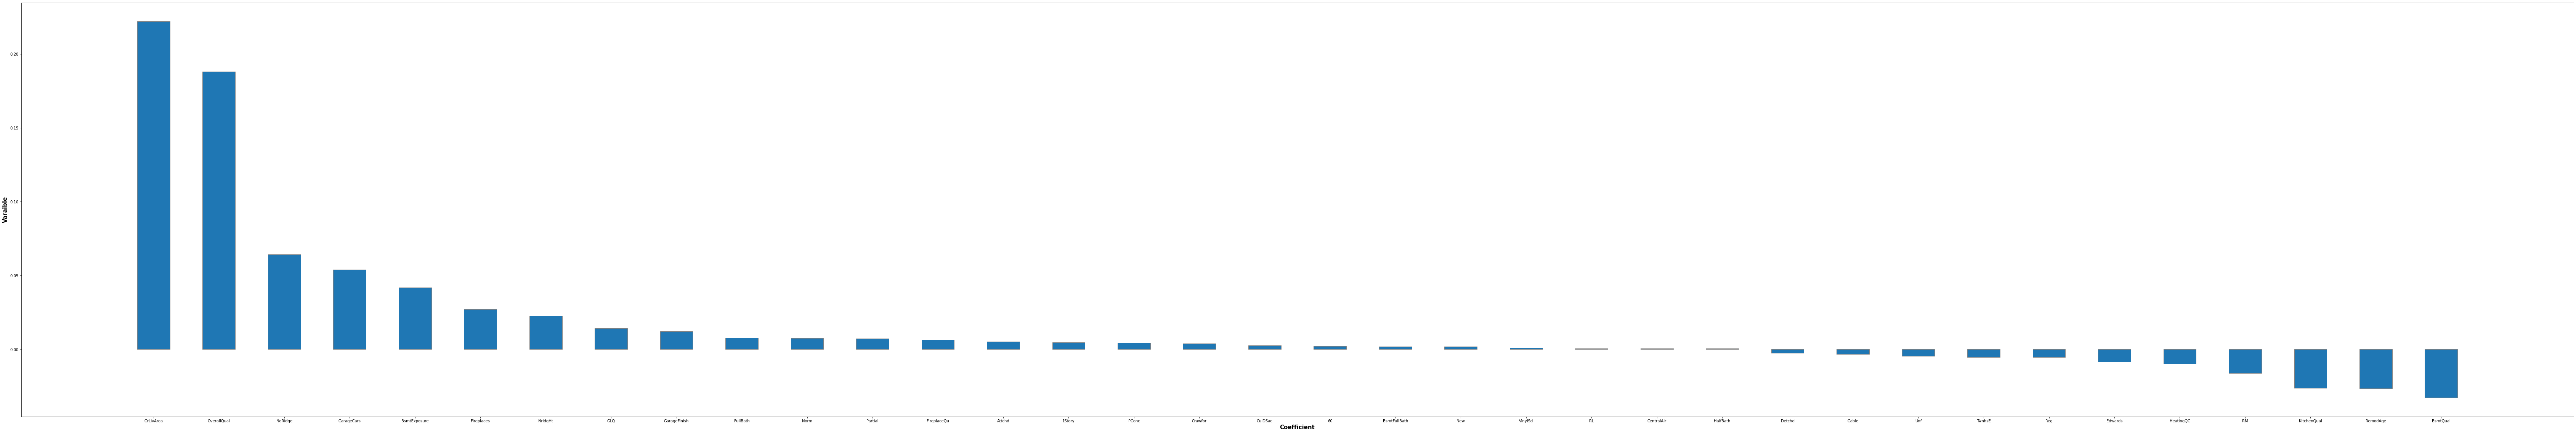

In [107]:
# ploting Top 5 coef 
lasso_coef_plt = coef_df[coef_df["Coefficient"] != 0].sort_values(by = "Coefficient", ascending = False)
plt.figure(figsize= (120,20))

br1 = np.arange(36)
plt.bar(br1, lasso_coef_plt["Coefficient"],  width = 0.5,
        edgecolor ='grey',)
plt.xlabel('Coefficient', fontweight ='bold', fontsize = 15)
plt.ylabel('Varaible', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(36)],
        list(lasso_coef_plt.index))
plt.show()



Test R2 for 1st model 0.7779246648810261


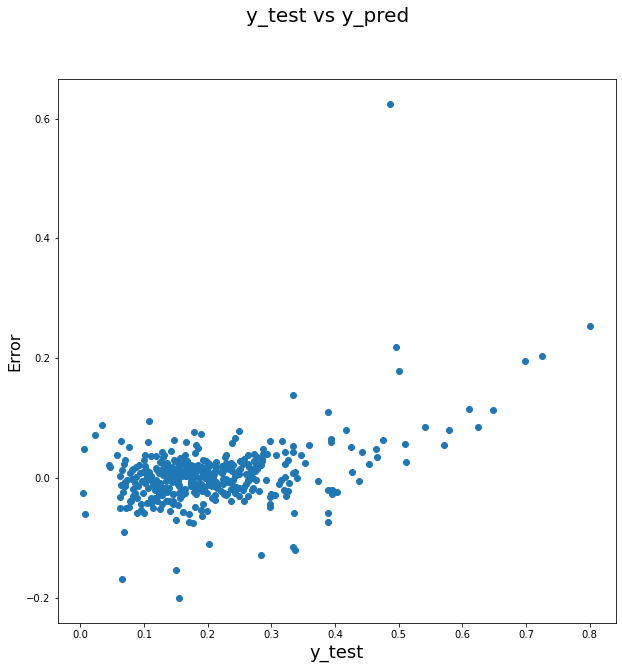

In [108]:
print("\n\nTest R2 for 1st model {}".format(r2_score(y_test, y_test_pred)))

fig = plt.figure(figsize = (10,10))
plt.scatter(y_test,y_test- y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('Error', fontsize=16)                          
plt.show()

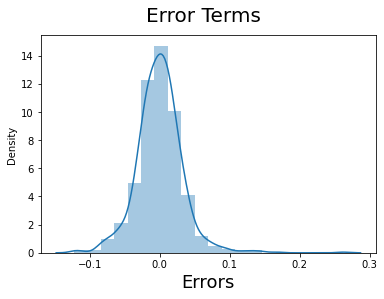

In [109]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)        
plt.show()

Optimal value of Alpha : 0.0001
most important predictor variables:

    GrLivArea: Above grade (ground) living area square feet
    OverallQual: Rates the overall material and finish of the house
    Neighborhood (Northridge) : Physical locations within Ames city limits
    GarageCars: Size of garage in car capacity
    BsmtExposure: Refers to walkout or garden level walls
    

## Final model selection

Since Laso is able to explain 

In [130]:
final_met = pd.DataFrame({'Metric': ['Regularization param','R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','Number of predictor variables'], 
             'LinearRegression':rfe_met,
             'Ridge':ridge_met,
             'Lasso':lasso_met})
final_met

,Metric,LinearRegression,Ridge,Lasso
0,Regularization param,32.000000,0.200000,0.001000
1,R2 Score (Train),0.908039,0.938428,0.826326
2,R2 Score (Test),0.777925,0.789859,0.808314
3,RSS (Train),1.131786,0.757786,2.137449
4,RSS (Test),1.210165,1.145130,1.044565
5,MSE (Train),0.001109,0.000742,0.002093
6,MSE (Test),0.002757,0.002608,0.002379
7,Number of predictor variables,32.000000,229.000000,36.000000


### From the above table we can clearly see that Lasso is the best model we can go with since it has best scores in unseen data and good score in train data, clearly indicating it is neither underfitting nor over fitting